<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Visualization with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Section_1"> Reading Data </a></li>
    <li><a href="#Section_2">Carpool vs State Box Plot</a> </li>
    <li><a href="#Section_3">Barplot for top 10 Counties for carpool </a></li>
    <li><a href="#Section_4">Choropleth Map </a></li>
    
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


In [12]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
%matplotlib inline

_Note: The dataset has been sourced from the link: <a href=https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv>Census Dataset</a>_


<h1> Part I</h1>


Q1) Use the pandas read_csv method to read the csv file into a pandas dataframe. Use the describe function to get the key statistics from the dataset.


In [2]:
# ETL
us_2015_df = pd.read_csv(r"acs2015_county_data.csv")
us_2015_df.head(3)


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6


In [3]:
us_2015_df.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
us_2015_df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
us_2015_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

<h1>Part II </h1>


Q2) You are representing a startup that is looking to pilot carpool rideshare services in the USA. As the Data Scientist perform the following:



    a. Create a box plot that compares carpooling habits between New York and California to determine where to focus your pilot efforts.

    b. From the above comparison create a bar plot to identify the top ten counties for the state that has a higher number of people who currently carpool. These counties will represent your pilot geography. Note that you will need to use the groupby function to group the mean carpool value for each county before you create the bar plot.


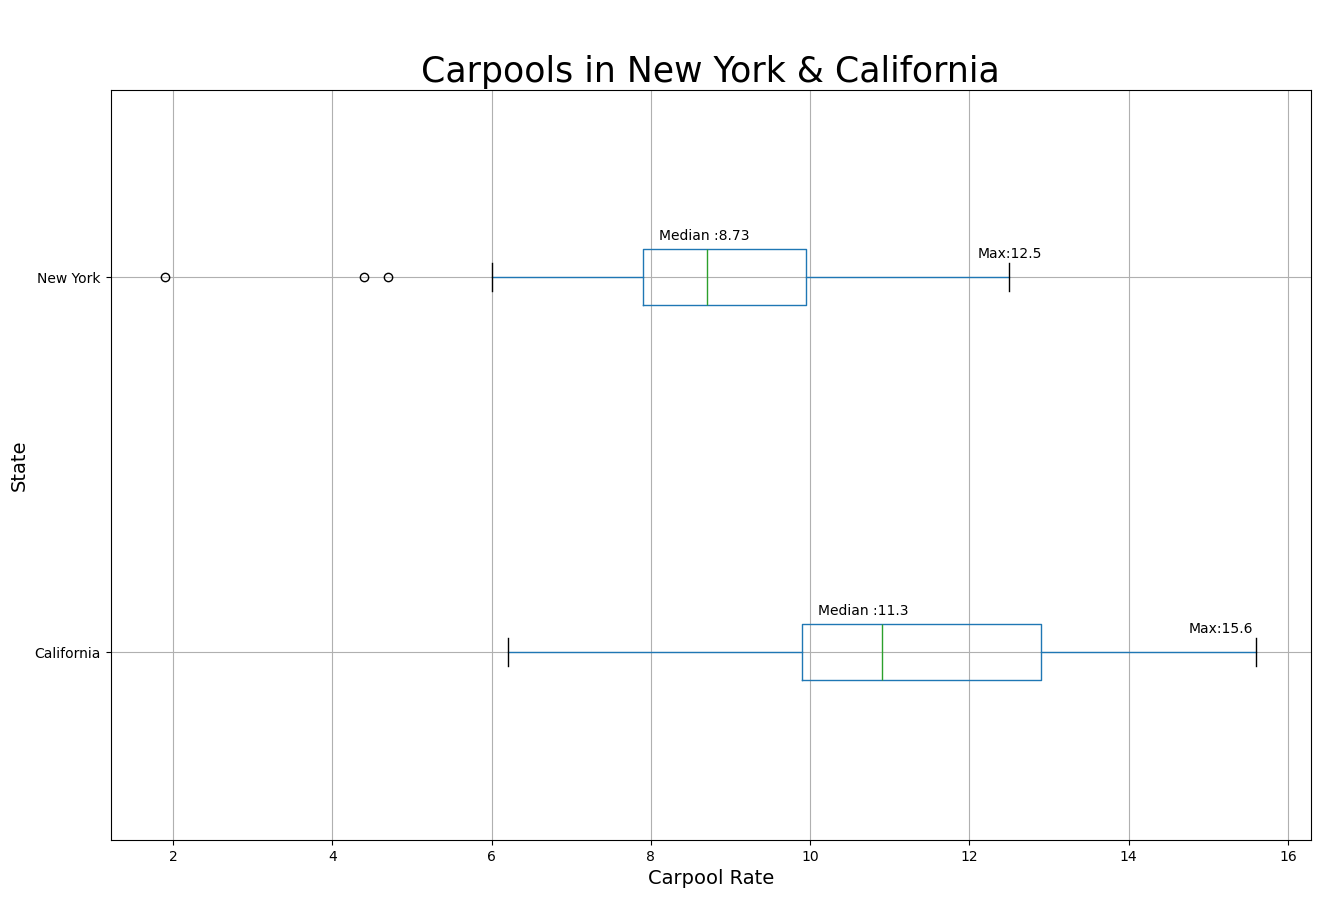

In [6]:
# Q2 a) A box plot

# us_2015_df['Carpool'].sort_values().unique()

carpool_ny_cal_df = us_2015_df[us_2015_df['State'].isin(['New York', 'California']) ] 
carpool_ny_cal_df = carpool_ny_cal_df[['State',                                       'Carpool']]
carpool_ny_cal_df.head(5)

# finding the median and the maximum values for newyork and california
ny_cp_median = f"Median :{round(np.mean(carpool_ny_cal_df[carpool_ny_cal_df['State']=='New York']['Carpool']),2)}"
ca_cp_median = f"Median :{round(np.mean(carpool_ny_cal_df[carpool_ny_cal_df['State']=='California']['Carpool']),2)}"
ny_max = f"Max:{np.max(carpool_ny_cal_df[carpool_ny_cal_df['State']=='New York']['Carpool'])}"
ca_max = f"Max:{np.max(carpool_ny_cal_df[carpool_ny_cal_df['State']=='California']['Carpool'])}"

# plotting the boxplot
fig, ax = plt.subplots(figsize=(15,10))
boxplot_ny_ca = carpool_ny_cal_df.boxplot(by='State', column='Carpool', 
                                          vert=False, ax=ax)

# labelling the boxplot
plt.title("Carpools in New York & California",fontsize=25)
ax.set_xlabel('Carpool Rate',fontsize=14)
ax.set_ylabel('State',fontsize=14)
plt.suptitle(' ')

# annotating the median and maximum values for new york and california
plt.annotate(ny_cp_median ,xy=(8.1,2.1))
plt.annotate(ca_cp_median ,xy=(10.1,1.1))
plt.annotate(ny_max,xy=(12.1,2.051))
plt.annotate(ca_max,xy=(14.75,1.051))

# visualizing the plot
fig.get_tight_layout()
plt.grid(True)
plt.savefig('Carpools for New york & California.png')





From the above image we can confirm that we can start our pilot efforts in California Because it has more carpools comparatively 
New York according to the data census provided on 2015.

In [7]:
# Q2 b)

# grouping through state , finding the highest carpool state in US 2015 through mean
highest_carpool_state_df = us_2015_df.groupby('State')['Carpool'].mean().reset_index()

# Sorting the state descending order
highest_carpool_state_df.sort_values(by='Carpool',ascending=False,inplace=True)

# finding the top carpool state 
highest_carpool_state_df.head(1)


,State,Carpool
1,Alaska,12.134483


From the above methods we have found that the highest carpool state is 'Alaska'

Now we will perform the top ten counties with highest carpool with the Alaska State since it is having the highest carpool

In [8]:
# sorting the alaska state with county and carpool
alaska_carpool_countys_df = us_2015_df[(us_2015_df['State']=='Alaska')]
alaska_carpool_countys_df = alaska_carpool_countys_df[['State','County','Carpool']]

# descending order of alaska county
alaska_carpool_countys_df.sort_values(by='Carpool',ascending=False,inplace=True)

# the top ten countys with highest carpool 
top_10_county_carpool_alaska = alaska_carpool_countys_df.head(10)
top_10_county_carpool_alaska

,State,County,Carpool
79,Alaska,Ketchikan Gateway Borough,18.0
71,Alaska,Bristol Bay Borough,17.3
91,Alaska,Southeast Fairbanks Census Area,17.0
85,Alaska,North Slope Borough,17.0
80,Alaska,Kodiak Island Borough,16.9
73,Alaska,Dillingham Census Area,16.0
94,Alaska,Yakutat City and Borough,16.0
77,Alaska,Juneau City and Borough,15.9
75,Alaska,Haines Borough,15.4
88,Alaska,Prince of Wales-Hyder Census Area,15.3


We have now found the top ten county's of the highest carpool state in US according to the census data of 2015



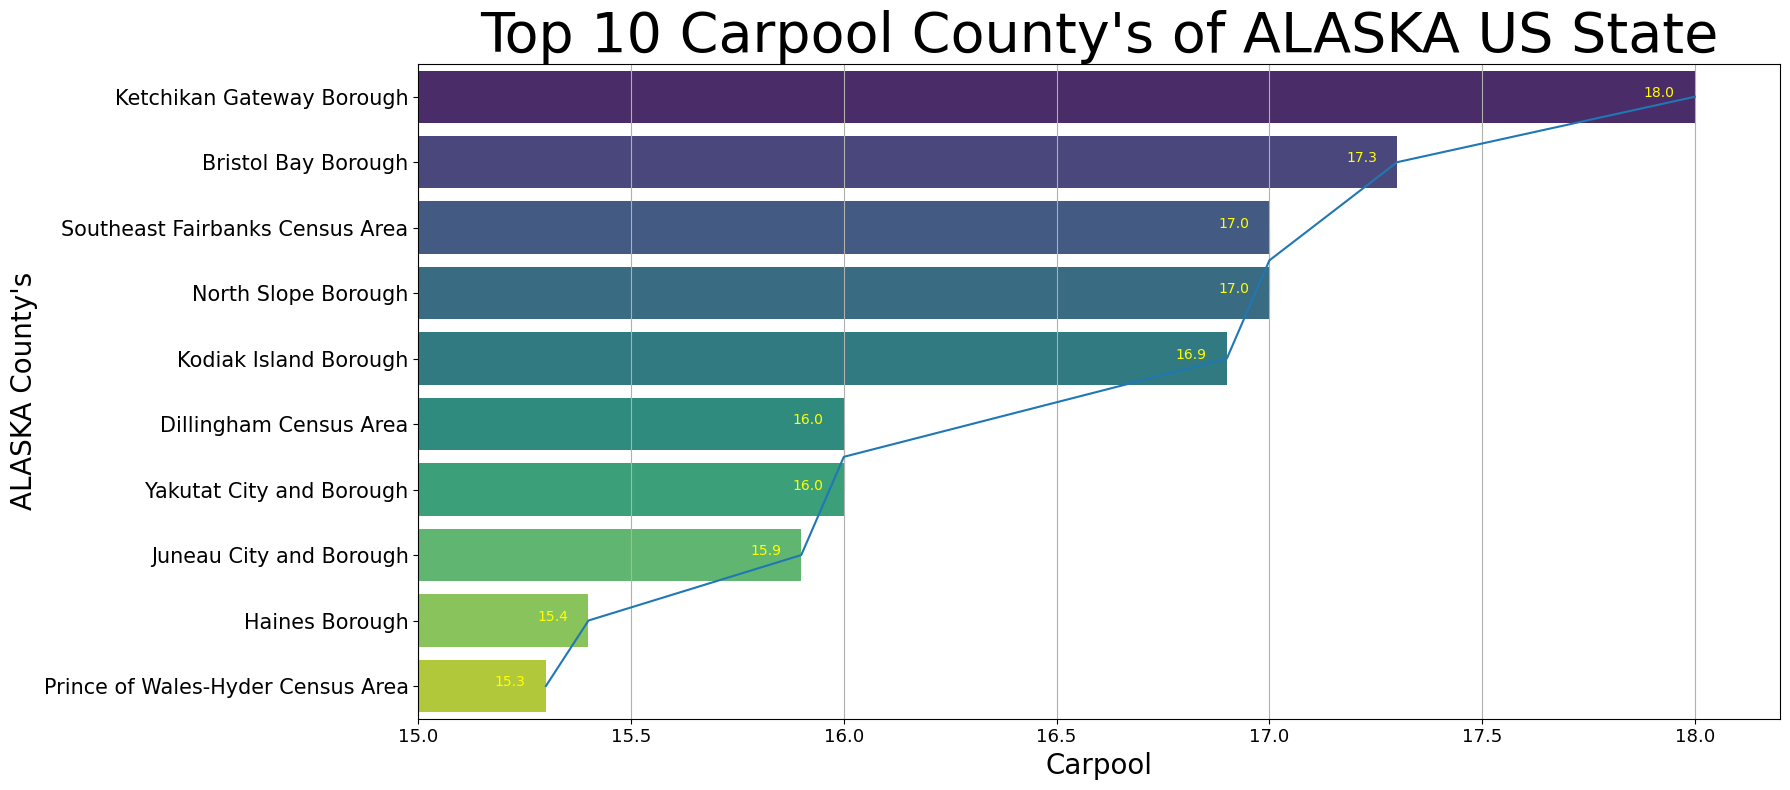

In [9]:
# plotting the bar graph for the top ten countys of alaska with highest carpool 

plt.figure(figsize=(18,8),edgecolor='black')
ax = sns.lineplot(top_10_county_carpool_alaska,
                 x='Carpool',
                 y='County')
sns.barplot(top_10_county_carpool_alaska,
           x='Carpool',
           y='County',
            ax=ax,
           capsize=0.01,
            palette='viridis',
            hue='County')
plt.xlim(15,18.2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

# labelling
plt.title("Top 10 Carpool County's of ALASKA US State",fontsize=40)
plt.xlabel('Carpool', fontsize=20)
plt.ylabel("ALASKA County's", fontsize=20)

# layouts
plt.grid(visible='bool',which='both',axis='x')
plt.tight_layout()

# annotations
for i,j in enumerate(top_10_county_carpool_alaska['Carpool']):
    # print(i,j)
    plt.annotate(f"{j}",xy=(j-0.12,i),color='yellow')


plt.savefig('Top 10 carpool Alaskan Countys.png')
plt.show()

<h1>Part III</h1>


Q3) Create a Choropleth map to plot the average income across states in the United States


Link for json file : <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillUp/labs/Final_Assignment/us-states.json> USA GeoJSON </a>


In [10]:
cols = [ 'State','Income','IncomeErr', 'IncomePerCap', 'IncomePerCapErr']
income_states = us_2015_df[cols]
income_states = income_states.groupby('State')[['Income']].mean().reset_index()
income_states

,State,Income
0,Alabama,37973.134328
1,Alaska,64197.103448
2,Arizona,43252.200000
3,Arkansas,36626.480000
4,California,56013.155172
5,Colorado,51263.187500
6,Connecticut,71184.125000
7,Delaware,58067.666667
8,District of Columbia,70848.000000
9,Florida,44046.477612


In [40]:
# making the choropleth map USA

# extracting and calling the json FIle
usa_json_file = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillUp/labs/Final_Assignment/us-states.json"
response = requests.get(usa_json_file)
usa_state_locs_json = response.json()


# USA Map initialization
USA_map = folium.Map(location=[55.5,
                            -95.5],
                    zoom_start=3.45,
                    tiles='CartoDB positron', 
                     attr='CartoDB positron')

# initializing choropleth map of USA
folium.Choropleth(
    geo_data=usa_json_file, 
    name='choropleth', 
    data=income_states, 
    columns=['State', 'Income'], 
    key_on='feature.properties.name', 
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2, 
    legend_name='Average Income by State (USA 2015 census)'
).add_to(USA_map)

folium.LayerControl().add_to(USA_map)

USA_map.save("usa_income_by_state_2015_choropleth_map.html")
USA_map


From the Choropleth MAP we can understand that Alaska and New York are having the highest average Income by state in USA according to the USA census demographic data in 2015

# Thank You 